In [1]:
from flask import Flask, request, render_template

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import dill
import pickle

In [2]:
from flask_ngrok import run_with_ngrok

In [3]:
import pickle

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils

def unpack(model, training_config, weights):
    restored_model = deserialize(model)
    if training_config is not None:
        restored_model.compile(
            **saving_utils.compile_args_from_training_config(
                training_config
            )
        )
    restored_model.set_weights(weights)
    return restored_model

# Hotfix function
def make_keras_picklable():

    def __reduce__(self):
        model_metadata = saving_utils.model_metadata(self)
        training_config = model_metadata.get("training_config", None)
        model = serialize(self)
        weights = self.get_weights()
        return (unpack, (model, training_config, weights))

    cls = Model
    cls.__reduce__ = __reduce__

In [4]:
model = keras.models.load_model("/Users/preethamvignesh/Desktop/Work/ML_EIT/TF_CNN_image/")

with open("/Users/preethamvignesh/Desktop/Work/ML_EIT/TF_CNN_image/tfmodel.pkl", "rb") as fname:
    tfmodelnew = pickle.load(fname)

# Define some parameters for the loader:
batch_size = 32
img_height = 64
img_width = 64
class_names = ['CT_COVID', 'CT_NonCOVID'] 
tfmodelnew.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

This image most likely belongs to CT_COVID with a 87.34 percent confidence.


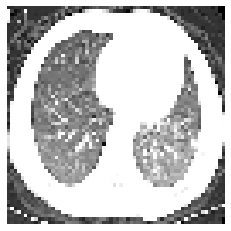

'tf.Tensor([8.7340993e-01 1.2657762e-01 2.8657946e-06 2.5579029e-06 6.9434132e-06], shape=(5,), dtype=float32)'

In [5]:
def predimg(timg):
    img = keras.preprocessing.image.load_img(timg, target_size=(img_height, img_width))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis("off")

    image1 = np.array(img).reshape((1,img_height,img_width,3))
    #print(image.shape,image1.shape)
    prediction = tfmodelnew.predict(image1)
    #print(prediction.shape)

    score = tf.nn.softmax(prediction[0])
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.show()
    
    return str(score)

timgg = "/Users/preethamvignesh/Desktop/Work/ML_EIT/Data/CT_COVID-Raw/CT_COVID/covid_45.jpg"
predimg(timgg)

In [6]:
app = Flask(__name__, template_folder='/Users/preethamvignesh/Desktop/Work/ML_EIT/TF_CNN_image/Templates')

In [7]:
#run_with_ngrok(app)   # Starts ngrok when the app is run

In [8]:

from flask import Flask, render_template, request 
# from werkzeug import secure_filename 
from werkzeug.utils import secure_filename
from keras.preprocessing.image import ImageDataGenerator 
import tensorflow as tf 
import numpy as np 
import os  
  
try: 
    import shutil 
    shutil.rmtree('uploaded / image') 
    % cd uploaded % mkdir image % cd .. 
    print() 
except: 
    pass

def predimg(timg):
    test_dir = 'uploaded'
    img = keras.preprocessing.image.load_img(timg, target_size=(img_height, img_width))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis("off")

    image1 = np.array(img).reshape((1,img_height,img_width,3))
    #print(image.shape,image1.shape)
    prediction = tfmodelnew.predict(image1)
    #print(prediction.shape)

    score = tf.nn.softmax(prediction[0])
    score1 = class_names[np.argmax(score)]
#     print(score1)
#     print("This image most likely belongs to {} with a {:.2f} percent confidence."
#           .format(class_names[np.argmax(score)], 100 * np.max(score)))
# #     plt.show()
    
#     return str(score1)
    return ("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
  
  
app.config['UPLOAD_FOLDER'] = '/Users/preethamvignesh/Desktop/Work/ML_EIT/TF_CNN_image/uploads'
  
@app.route('/',methods=['POST','GET']) 
def upload_f(): 
    
    message=""
    if request.method == 'POST': 
        f = request.files['file'] 
        filename = secure_filename(f.filename)
        f.save(os.path.join(app.config['UPLOAD_FOLDER'], filename)) 
        message = predimg(os.path.join(app.config['UPLOAD_FOLDER'], filename))

    return render_template('upload.html', message=message) 


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Oct/2020 12:55:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:11] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:43] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2020 12:55:43] "GET / HTTP/1.1" 200 -


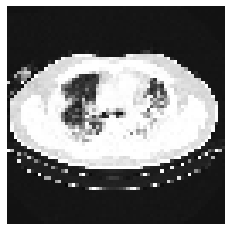

In [9]:
app.run()

In [10]:
# http://127.0.0.1:5000/